In [1]:
import requests
import json
#627c28c07ad221c65491bbffea6f5d54
#68a952b60155797d28def1585d888b9f
#a1460684c45b3ba1a38a6b1473597055
#399720f6f904f106e162cd2bd0011a6f
#816c8c7a9e52da5bd2dcc0446558288d

In [2]:
user_key = "627c28c07ad221c65491bbffea6f5d54"
basic_api = 'https://developers.zomato.com/api/v2.1'
header = {"User-agent":"curl/7.43.0","Accept":"application/json","user-key":user_key}

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

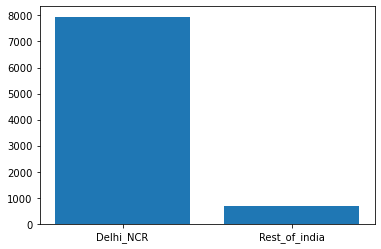

In [4]:
df = pd.read_csv('zomato.csv',encoding = 'ISO-8859-1')
df = df[df['Country Code']==1]
Delhi_NCR = {'New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad'}
dictionary = {'Delhi_NCR' : 0 , 'Rest_of_india' : 0}
def city(city_name):
    if city_name in Delhi_NCR:
        dictionary['Delhi_NCR'] += 1
        return "Delhi_NCR"
    else:
        dictionary['Rest_of_india'] += 1
        return "Rest_of_india"
df_with_group_city = df.copy()
df_with_group_city['City'] = df_with_group_city['City'].apply(city)
group_name = []
restaurant_count = []
for key,value in dictionary.items():
    group_name.append(key)
    restaurant_count.append(value)
plt.bar(group_name,restaurant_count)
plt.show()

In [5]:
df_with_group_city["City_Cuisines"] = df_with_group_city["City"] + "   " + df_with_group_city["Cuisines"]
restaurant_cuisines = set()
delhi_ncr_cuisines = set()
def city_cuisines(cuisines):
    city = cuisines.split("   ")[0]
    cuisines = cuisines.split("   ")[1].split(", ")
    if city=='Delhi_NCR':
        for cuisine in cuisines:
            delhi_ncr_cuisines.add(cuisine)
    else:
        for cuisine in cuisines:
            restaurant_cuisines.add(cuisine)
    return cuisines
df_with_group_city['City_Cuisines'].apply(city_cuisines)
cuisines_not_in_delhi_ncr = []
for cuisine in restaurant_cuisines:
    if cuisine in delhi_ncr_cuisines:
        continue
    else:
        cuisines_not_in_delhi_ncr.append(cuisine)
print(*cuisines_not_in_delhi_ncr)
response = requests.get(basic_api + '/cuisines' , headers = header , params = {'city_id' : 1})
data = response.json()
check = False
for i in data['cuisines']:
    if i['cuisine']['cuisine_name'] in cuisines_not_in_delhi_ncr:
        check = True
        break
print(check)

Cajun German BBQ Malwani
True


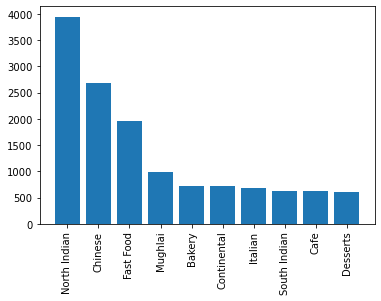

In [6]:
cuisines_count = {}
def get_cuisines(cuisines):
    list_cuisines = cuisines.split(", ")
    for cuisine in list_cuisines:
        cuisines_count[cuisine]  = cuisines_count.get(cuisine,0) + 1
df_with_group_city['Cuisines'].apply(get_cuisines)
cuisines_name_count = []
for key,value in cuisines_count.items():
    cuisines_name_count.append([value,key])
cuisines_name_count.sort(reverse=True)
cuisines = [ i[1] for i in cuisines_name_count[:10]]
counts = [ i[0] for i in cuisines_name_count[:10]]
plt.bar(cuisines,counts)
plt.xticks(rotation=90)
plt.show()

Delhi-NCR  86
Rest India  70


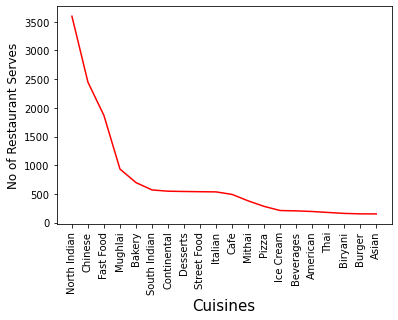

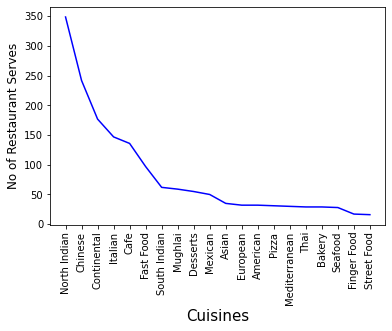

In [7]:
delhi_ncr_cuisines_with_count = {}
rest_of_india_cuisines_with_count = {}
def city_cuisines_with_count(city_cuisines):
    city = city_cuisines.split("   ")[0]
    list_cuisines = city_cuisines.split("   ")[1].split(", ")
    if city=="Delhi_NCR":
        for cuisine in list_cuisines:
            delhi_ncr_cuisines_with_count[cuisine] = delhi_ncr_cuisines_with_count.get(cuisine,0)+1
    else:
        for cuisine in list_cuisines:
            rest_of_india_cuisines_with_count[cuisine] = rest_of_india_cuisines_with_count.get(cuisine,0)+1
            
df_with_group_city["City_Cuisines"].apply(city_cuisines_with_count)


no_of_cuisines_in_delhi_ncr = len(delhi_ncr_cuisines_with_count)
no_of_cuisines_in_rest_india = len(rest_of_india_cuisines_with_count)
print("Delhi-NCR ",no_of_cuisines_in_delhi_ncr)
print("Rest India ",no_of_cuisines_in_rest_india)

delhi_ncr_cuisine_with_count = [[value,key] for key,value in delhi_ncr_cuisines_with_count.items()]
rest_india_cuisine_with_count = [[value,key] for key,value in rest_of_india_cuisines_with_count.items()]

delhi_ncr_cuisine_with_count.sort(reverse = True)
rest_india_cuisine_with_count.sort(reverse = True)

delhi_ncr_cuisine = [ i[1] for i in delhi_ncr_cuisine_with_count][:20]
delhi_ncr_count = [ i[0] for i in delhi_ncr_cuisine_with_count][:20]
rest_india_cuisine = [ i[1] for i in rest_india_cuisine_with_count][:20]
rest_india_count = [ i[0] for i in rest_india_cuisine_with_count][:20]


plt.plot(delhi_ncr_cuisine,delhi_ncr_count,c="r")
plt.xticks(rotation=90)
plt.xlabel("Cuisines", size = 15)
plt.ylabel("No of Restaurant Serves", size = 12)
plt.show()

plt.plot(rest_india_cuisine,rest_india_count,c="b")
plt.xticks(rotation=90)
plt.xlabel("Cuisines", size = 15)
plt.ylabel("No of Restaurant Serves", size = 12)
plt.show()